In [1]:
## import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
os.getcwd()
#os.chdir('C:\\Users\\Admin\\Downloads')

pd.set_option('max_rows',20000)
pd.set_option('max_columns',2000)

In [2]:
## Loading dataset

data = pd.read_csv("BankCreditCard.csv")
data.head()

## Checking rows and columns
shape = data.shape
print('No of rows and col : {}'.format(shape))

## dataset contains 30000 rows and 25 columns

size = data.size
print('Size of dataset : {}'.format(size))

## dataset size is 750000

data.info() 

## Most of the attributes are int and float

data.describe()


No of rows and col : (30000, 25)
Size of dataset : 750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,15000.500000,1.929173e+05,1.603733,1.855933,1.551867,35.485500,0.355200,0.319300,0.302967,0.25670,0.219500,0.224900,81581.060100,52517.103000,5.900389e+04,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,8660.398374,1.322888e+05,0.489129,0.794397,0.521970,9.217904,0.746984,0.796012,0.781792,0.74388,0.699954,0.700573,123026.372701,80401.365192,8.841747e+04,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,1.000000,2.000000e+04,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-365580.000000,-58777.000000,-2.572640e+05,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7500.750000,5.000000e+04,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3890.000000,3517.000000,2.876000e+03,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,15000.500000,2.200000e+05,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,35661.500000,30538.000000,2.656800e+04,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,22500.250000,2.700000e+05,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,67091.000000,57420.500000,6.025250e+04,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,30000.000000,2.000000e+06,2.000000,6.000000,3.000000,79.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,964533.000000,883831.000000,2.664089e+06,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [3]:
## Target variable is Default_Payment


## Checking dtype

data.dtypes

## checking missing values

data.isnull().sum() ## no missing values

## checking duplicates

data.duplicated().sum() ## no duplicates


0

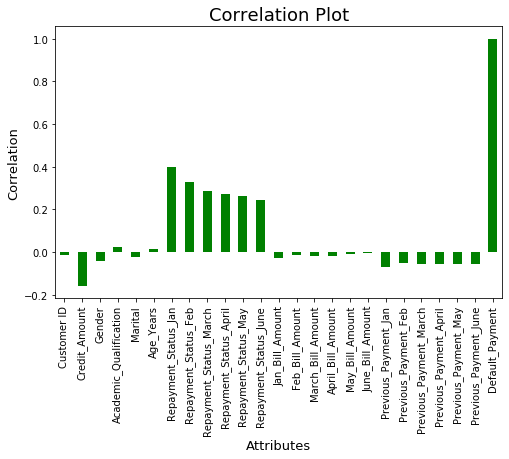

In [4]:
## chceking correlation with target variable
plt.figure(figsize = (8,5))
data.corr()['Default_Payment'].plot(kind = 'bar', color = 'green')
plt.title('Correlation Plot', size = 18)
plt.xlabel("Attributes", size = 13)
plt.ylabel('Correlation', size = 13)
plt.show()


## Most of the attributes has a negative correlation with the target variable
## Repayment status from jan to june has a positive correlation with the Default_payment

## repayment status from jan has the highest positive correlation amongst all
## Credit Amount has the highest negative correlation with deafult_payment

In [5]:
## checking no of unique values
data.nunique()

## So, customer id is a primary key it has no of unique values equal to the no of rows

Customer ID               30000
Credit_Amount                64
Gender                        2
Academic_Qualification        6
Marital                       4
Age_Years                    56
Repayment_Status_Jan          7
Repayment_Status_Feb          7
Repayment_Status_March        7
Repayment_Status_April        7
Repayment_Status_May          6
Repayment_Status_June         6
Jan_Bill_Amount           14575
Feb_Bill_Amount           13777
March_Bill_Amount         18832
April_Bill_Amount         15358
May_Bill_Amount           18611
June_Bill_Amount          18376
Previous_Payment_Jan       4000
Previous_Payment_Feb       4922
Previous_Payment_March     3679
Previous_Payment_April     4456
Previous_Payment_May       4382
Previous_Payment_June      6939
Default_Payment               2
dtype: int64

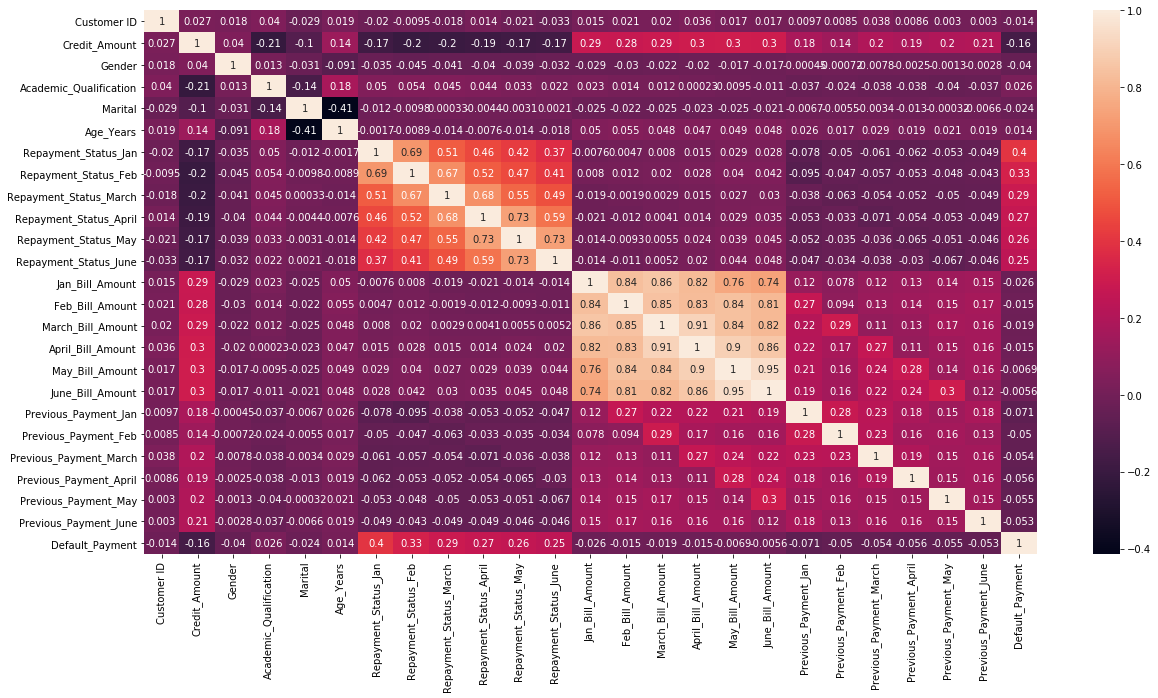

In [6]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True)

##  Variables highly positive correlated -------

## All the bill_Amounts are highly positive correlated with each other(0.76 - 0.95)
## All the Repayment_Status are also highly positive correlation but not more than bill_amounts

## Marital and Age_years has a high negative correlation(-0.41)

## Credit amount and Academic Qualification has a high neg correlation(-0.21)


In [7]:
## Renaming categorical features in a proper manner

## Gender
data.loc[:,['Gender']] = data['Gender'].apply(lambda x : 'Male' if x == 1 else 'Female')
Gen = data['Gender'].value_counts(normalize = True)*100
print('Percentage of Gender : {}'.format(Gen))
## 60 percent are Females
## 39 percent Males

## Academic Qualification
data['Academic_Qualification'].replace([1,2,3,4,5,6],['Undergraduate','Graduate','Postgraduate','Professional','Others','Unknown'], inplace = True)
aca = data['Academic_Qualification'].value_counts(normalize = True)*100
print("Percentage of Academic Background : {}".format(aca))
# Graduate - 46 percent, 
#Undergradute - 35 perc, 
#Postgraduate - 16 perc
#others - 0.93 
# Professional - 0.41
# unknown - 0.21

## Marital
data['Marital'].replace([1,2,3,0],['Married','Single','Do not prefer to say', 'Undefined'], inplace = True)
mar = data['Marital'].value_counts(normalize = True)*100 
print('Percentage of Marital Status : {}'.format(mar))
## 53 percent of the clients are sigle, 
## 45 percent married, 
## 1.07 percent don't prefer to say, 
## 0.18 - Undefined

## Age
data['Age_Years'].describe()
bins = [0,20,40,60,80]
l = ['0-20','20-40','40-60','60-80']
data = data.assign(Age_Years = pd.cut(data['Age_Years'], labels = l, bins = bins, include_lowest = True))
age = data['Age_Years'].value_counts(normalize = True)*100
print("Percentage of Age : {}".format(age))
## 72 percent of the clients are between the age 20-40
## 26 percent of the clients are between 40-60
## 0.90 percent of the clients are in between 60-80 years
## no client is between age 0-20

## Default Payment
data['Default_Payment'].replace([1,0],['Yes','No'], inplace = True)
default = data['Default_Payment'].value_counts(normalize = True)*100
print('Percentage of Default Payment : {}'.format(default))
## Client with default payment of next month is 22 percent
## Clinet wihout default payment of next month is 77 percent


Percentage of Gender : Female    60.373333
Male      39.626667
Name: Gender, dtype: float64
Percentage of Academic Background : Graduate         46.766667
Undergraduate    35.283333
Postgraduate     16.390000
Others            0.933333
Professional      0.410000
Unknown           0.216667
Name: Academic_Qualification, dtype: float64
Percentage of Marital Status : Single                  53.213333
Married                 45.530000
Do not prefer to say     1.076667
Undefined                0.180000
Name: Marital, dtype: float64
Percentage of Age : 20-40    72.420000
40-60    26.673333
60-80     0.906667
0-20      0.000000
Name: Age_Years, dtype: float64
Percentage of Default Payment : No     77.88
Yes    22.12
Name: Default_Payment, dtype: float64


In [8]:
# i am doing ordinal label for my 
order_label= {0: 'Ptime',
             1: 'Pd1M',
             2: 'Pd2M',
             3: 'Pd3M',
             4: 'Pd4M',
             5: 'Pd5M',
             6: 'Pd6M'}

data['Repayment_Status_Jan'] = data['Repayment_Status_Jan'].map(order_label)
data['Repayment_Status_Feb']= data['Repayment_Status_Feb'].map(order_label)
data['Repayment_Status_March']= data['Repayment_Status_March'].map(order_label)
data['Repayment_Status_April']= data['Repayment_Status_April'].map(order_label)
data['Repayment_Status_May']= data['Repayment_Status_May'].map(order_label)
data['Repayment_Status_June']= data['Repayment_Status_June'].map(order_label)

In [9]:
## Merging the categories of don not prefer and undefined in married column
data['Marital'].replace({'Do not prefer to say' : 'Undefined'}, inplace = True)
data['Marital'].value_counts()



Single       15964
Married      13659
Undefined      377
Name: Marital, dtype: int64

In [10]:
## Converting selected columns into categorical
col = ['Gender','Academic_Qualification','Marital','Age_Years',
       'Repayment_Status_Jan','Repayment_Status_Feb','Repayment_Status_March','Repayment_Status_April','Repayment_Status_May',
        'Repayment_Status_June','Default_Payment']

data.loc[:,col] = data.loc[:,col].astype('category')
data.dtypes



Customer ID                  int64
Credit_Amount              float64
Gender                    category
Academic_Qualification    category
Marital                   category
Age_Years                 category
Repayment_Status_Jan      category
Repayment_Status_Feb      category
Repayment_Status_March    category
Repayment_Status_April    category
Repayment_Status_May      category
Repayment_Status_June     category
Jan_Bill_Amount            float64
Feb_Bill_Amount            float64
March_Bill_Amount          float64
April_Bill_Amount          float64
May_Bill_Amount            float64
June_Bill_Amount           float64
Previous_Payment_Jan       float64
Previous_Payment_Feb       float64
Previous_Payment_March     float64
Previous_Payment_April     float64
Previous_Payment_May       float64
Previous_Payment_June      float64
Default_Payment           category
dtype: object

In [11]:

feature_df = data.drop('Default_Payment', axis = 1)
target = data['Default_Payment']

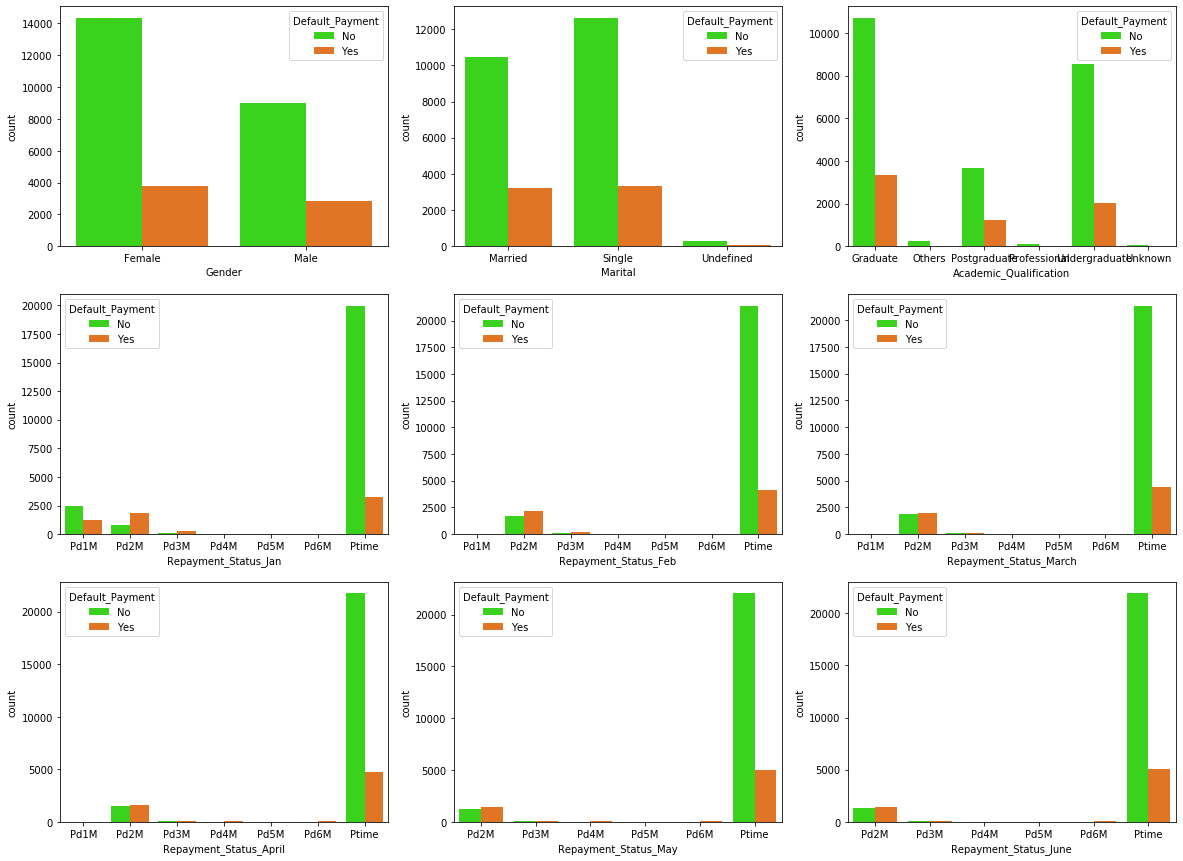

In [12]:
catg_var= ['Gender','Marital','Academic_Qualification','Repayment_Status_Jan','Repayment_Status_Feb',
            'Repayment_Status_March','Repayment_Status_April','Repayment_Status_May','Repayment_Status_June']

plt.figure(figsize=(20,15))
for i, v in enumerate(catg_var):
           plt.subplot(3,3,i+1)
           sns.countplot(x= data[v], hue= data['Default_Payment'],data= data, palette= 'gist_ncar')
        

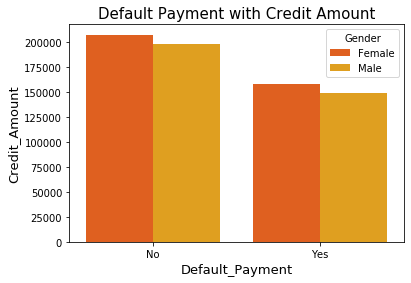

In [13]:
## Credit Amount vs Default_Payment
sns.barplot(x = 'Default_Payment', y = 'Credit_Amount', hue = 'Gender', data = data, palette = 'autumn', ci = None)
plt.title('Default Payment with Credit Amount', size = 15)
plt.xlabel('Default_Payment', size = 13)
plt.ylabel('Credit_Amount',size = 13)
plt.show()

## Credit amount is higher for those clients those whoes default payment is not next month
## credit amount for those whoes default payment is not next month  is higher for the female clients but not much difference from the male clients


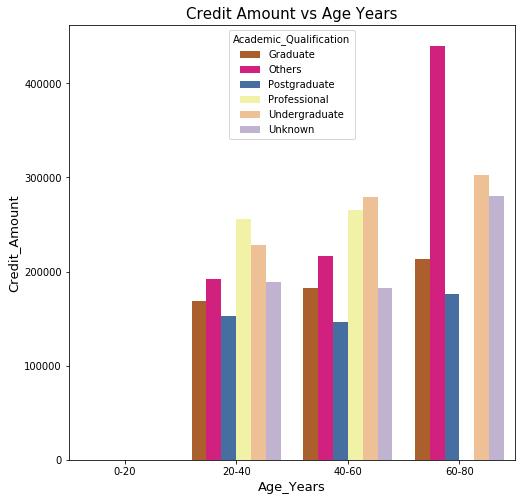

In [14]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'Age_Years', y = 'Credit_Amount', data = data, hue = 'Academic_Qualification', palette = 'Accent_r', ci = None)
plt.title('Credit Amount vs Age Years', size = 15)
plt.xlabel('Age_Years', size = 13)
plt.ylabel('Credit_Amount',size = 13)
plt.show()

## No client in the age group 0-20 raised a credit amount
## Maxium credit amount raised from a client who is in 60-80 years of age group and has other academic qualification
## No client with Professional degree raised a credit amount in the age group of 60-80

## Max amount from all the degree is raised in the age group of 60-80

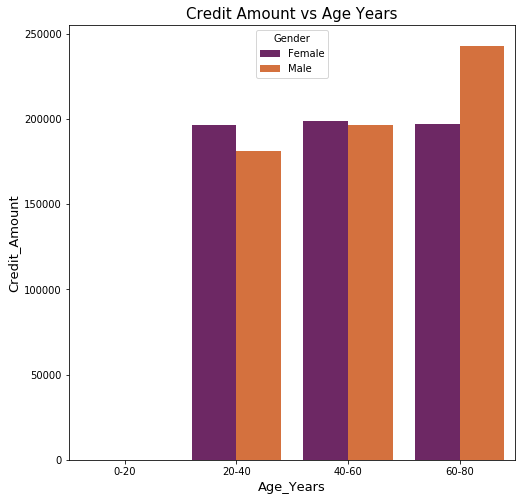

In [15]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'Age_Years', y = 'Credit_Amount', data = data, hue = 'Gender', palette = 'inferno', ci = None)
plt.title('Credit Amount vs Age Years', size = 15)
plt.xlabel('Age_Years', size = 13)
plt.ylabel('Credit_Amount',size = 13)
plt.show()

## Male clients between the age group 60-80 raised a max credit amount
## Female and male clients in the agr group of 40-60 raised approx equal credit amount
## Female clients in the age group of 20-40 raised a max credit amount than males

In [16]:
## 
data.groupby(['Gender','Default_Payment'])['Credit_Amount'].sum()

## Clients without default payment for the next month raised a less amount than the default payment for next month

## Credit amount is higher for the female clients whoes default payment is for next month

Gender  Default_Payment
Female  No                 2.976966e+09
        Yes                5.944100e+08
Male    No                 1.788566e+09
        Yes                4.275777e+08
Name: Credit_Amount, dtype: float64

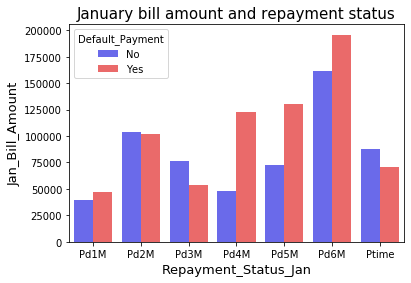

In [17]:
## Repayment status jan and jan bill amount
sns.barplot(x = 'Repayment_Status_Jan', y = "Jan_Bill_Amount", data = data, hue = 'Default_Payment', palette = 'seismic', ci = None)
plt.title('January bill amount and repayment status', size = 15)
plt.xlabel('Repayment_Status_Jan',size = 13)
plt.ylabel('Jan_Bill_Amount', size = 13)
plt.show()

## Clients whoes payment delay for 6 months in jan raised a higher bill amount 
## clients whoes payment delay for one month in jan raised a very less bill amount 
## Clients whoes payment delay for 2 and 3 months are mostly thoes who doesn't have default payment to the next month 


In [18]:
data['Default_Payment'].value_counts(normalize = True)*100 



No     77.88
Yes    22.12
Name: Default_Payment, dtype: float64

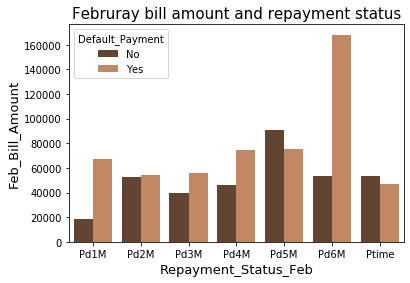

In [19]:
sns.barplot(x = 'Repayment_Status_Feb', y = "Feb_Bill_Amount", data = data, hue = 'Default_Payment', palette = 'copper', ci = None )
plt.title('Februray bill amount and repayment status', size = 15)
plt.xlabel('Repayment_Status_Feb',size = 13)
plt.ylabel('Feb_Bill_Amount', size = 13)
plt.show()

## Max bill amount raised by the clients whoes payment delay for 6 months

## Clients with payment delayed for 0 2 and 5 months are mostly thoes whoes default payment is not for next month



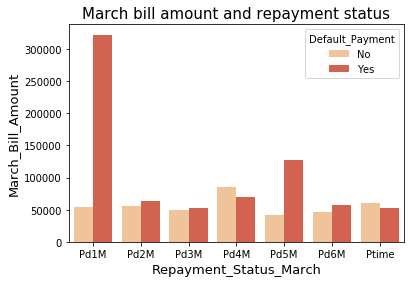

In [20]:
sns.barplot(x = 'Repayment_Status_March', y = "March_Bill_Amount", data = data, hue = 'Default_Payment', palette = 'OrRd',ci = None)
plt.title('March bill amount and repayment status', size = 15)
plt.xlabel('Repayment_Status_March',size = 13)
plt.ylabel('March_Bill_Amount', size = 13)
plt.show()

## Clients whoes payment delay for one month are mostly the ones whoes default payment for the next month with the heavy bill amount

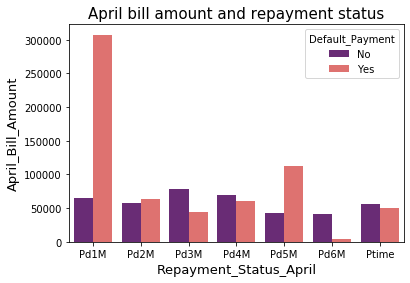

In [21]:
sns.barplot(x = 'Repayment_Status_April', y = "April_Bill_Amount", data = data, hue = 'Default_Payment', palette = 'magma',ci = None)
plt.title('April bill amount and repayment status', size = 15)
plt.xlabel('Repayment_Status_April',size = 13)
plt.ylabel('April_Bill_Amount', size = 13)
plt.show()

## Clients whoes payment delay for one month are mostly the ones whoes default payment for the next month with the heavy bill amount
## clients with default payment to next month are quite less at the end of 6th month

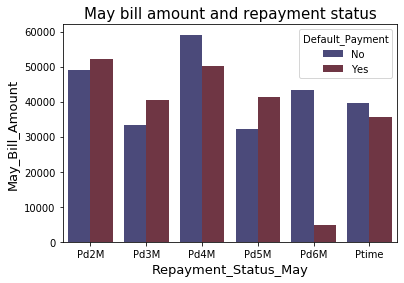

In [22]:
sns.barplot(x = 'Repayment_Status_May', y = "May_Bill_Amount", data = data, hue = 'Default_Payment', palette = 'icefire',ci = None)
plt.title('May bill amount and repayment status', size = 15)
plt.xlabel('Repayment_Status_May',size = 13)
plt.ylabel('May_Bill_Amount', size = 13)
plt.show()

## Max bill amount raised by the clients whoes payment delay for 4 months
## Clients with paymemt delay for 4 months are mostly the ones whoes default payment is not to the next month



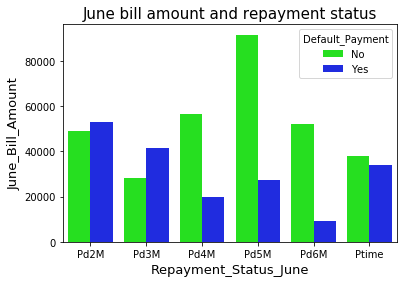

In [23]:
sns.barplot(x = 'Repayment_Status_June', y = "June_Bill_Amount", data = data, hue = 'Default_Payment', palette = 'hsv',ci = None)
plt.title('June bill amount and repayment status', size = 15)
plt.xlabel('Repayment_Status_June',size = 13)
plt.ylabel('June_Bill_Amount', size = 13)
plt.show()

## Max amount raised by the clients whoes payment delayed for 5 months


In [24]:
data.groupby('Default_Payment')['Previous_Payment_Jan','Previous_Payment_Feb','Previous_Payment_March','Previous_Payment_April','Previous_Payment_May','Previous_Payment_June'].sum()
## Usually clients who don't have default payment to next month are more likely to have higher previous payment amount


,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
Default_Payment,,,,,,
No,163504179.0,196000616.0,150299112.0,131716192.0,134576509.0,133627402.0
Yes,25065437.0,27995698.0,24785105.0,22114431.0,23259227.0,22837675.0


In [25]:
data['Avg_exp_jan'] = data['Jan_Bill_Amount'] - data['Previous_Payment_Jan']/ data['Credit_Amount']
data['Avg_exp_feb'] = data['Feb_Bill_Amount'] - data['Previous_Payment_Feb']/data['Credit_Amount']
data['Avg_exp_march'] = data['March_Bill_Amount'] - data['Previous_Payment_March']/data['Credit_Amount']
data['Avg_exp_april'] = data['April_Bill_Amount'] - data['Previous_Payment_April']/data['Credit_Amount']
data['Avg_exp_may'] = data['May_Bill_Amount'] - data['Previous_Payment_May']/data['Credit_Amount']
data['Avg_exp_june'] = data['June_Bill_Amount'] - data['Previous_Payment_June']/data['Credit_Amount']

In [26]:
col = ['Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June','Credit_Amount']

data.drop(col, inplace = True, axis = 1)
data.columns

Index(['Customer ID', 'Gender', 'Academic_Qualification', 'Marital',
       'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Default_Payment',
       'Avg_exp_jan', 'Avg_exp_feb', 'Avg_exp_march', 'Avg_exp_april',
       'Avg_exp_may', 'Avg_exp_june'],
      dtype='object')

In [27]:
## Converting stri g values to upper case
str_col = ['Gender','Academic_Qualification','Marital','Default_Payment']
data.loc[:,str_col] = data.loc[:,str_col].apply(lambda x : x.str.upper())
data.loc[:,str_col] = data.loc[:,str_col].apply(lambda x : x.str.strip())

data.head()

,Customer ID,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Default_Payment,Avg_exp_jan,Avg_exp_feb,Avg_exp_march,Avg_exp_april,Avg_exp_may,Avg_exp_june
0,1,FEMALE,GRADUATE,MARRIED,20-40,Pd2M,Pd2M,Ptime,Ptime,Ptime,Ptime,YES,3933.000000,3102.966050,689.000000,0.000000,0.000000,0.000000
1,2,FEMALE,GRADUATE,SINGLE,20-40,Ptime,Pd2M,Ptime,Ptime,Ptime,Pd2M,YES,3683.000000,1734.990909,2681.995455,3271.995455,3455.000000,3260.990909
2,3,FEMALE,GRADUATE,SINGLE,20-40,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,39338.982011,14036.972222,23558.988889,24331.988889,14847.988889,15547.944444
3,4,FEMALE,GRADUATE,MARRIED,20-40,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,46989.940000,48332.959420,49291.976000,29323.978000,28857.978620,28546.980000
4,5,MALE,GRADUATE,MARRIED,40-60,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,8636.940000,5569.266560,35834.800000,20939.820000,18145.986220,18130.986420


In [28]:
feature_df = data.drop(['Customer ID', 'Default_Payment'],1)
target = data['Default_Payment']

In [30]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Anam' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

rf = RandomForestClassifier(n_estimators = 250, random_state = 10)
sfs1 = sfs(rf,k_features = 12, forward = False, verbose = 1)
sfs1.fit(feature_df,target)

sfs1.k_feature_names_


ModuleNotFoundError: No module named 'mlxtend'

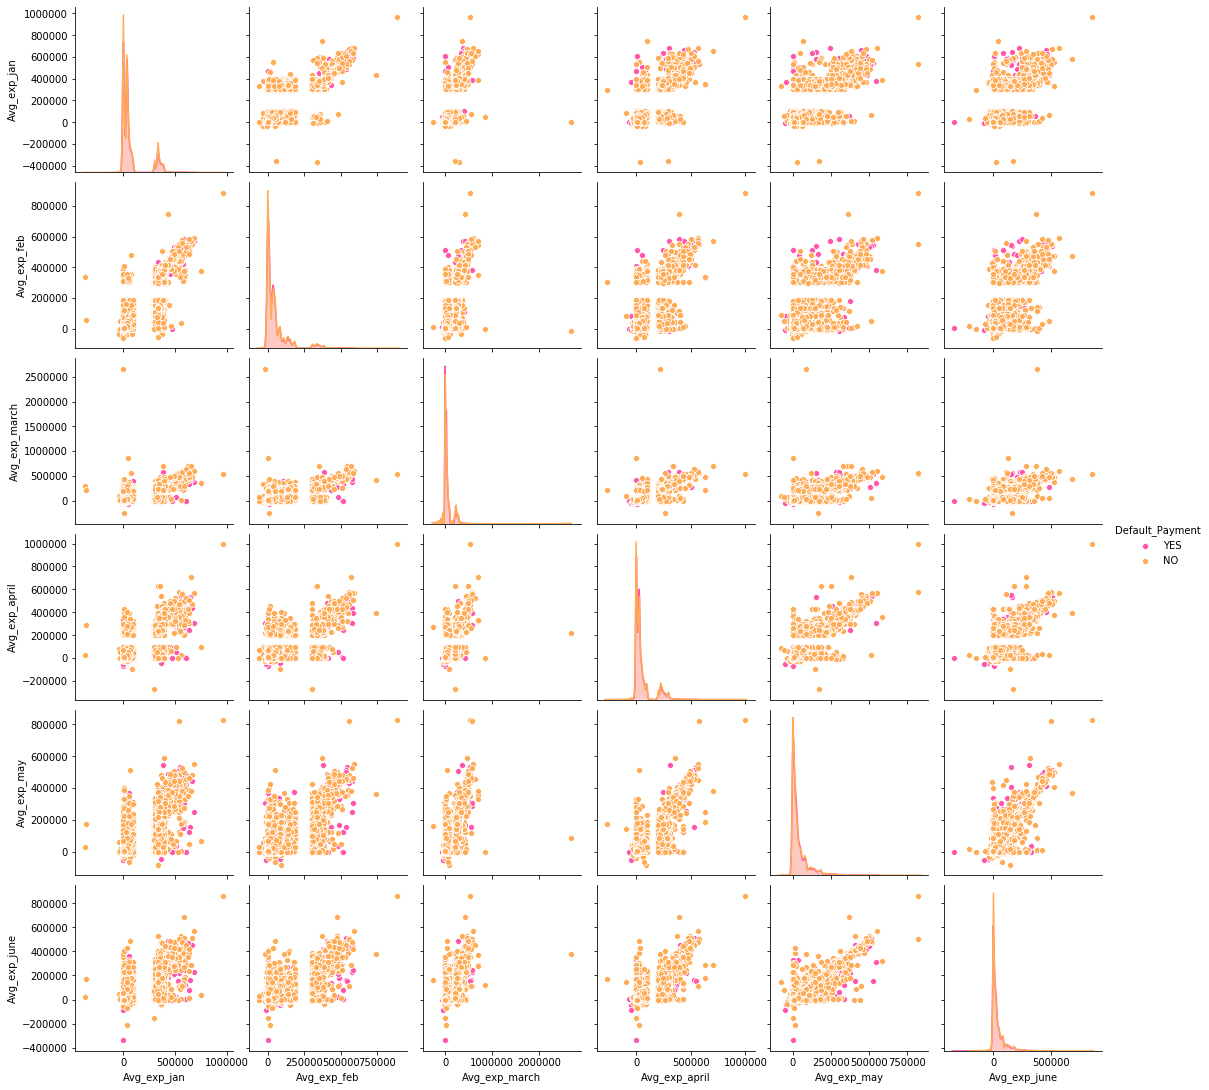

In [32]:
sns.pairplot(data, vars=data.columns[12:18], kind='scatter',hue= 'Default_Payment', palette = 'spring')

In [33]:
## Outlier treatment

def Outlier(data):
    for column in data.columns:
        if data[column].dtype == 'float64':
            Q1 = np.percentile(data[column].values,25)
            Q3 = np.percentile(data[column].values,75)
            IQR = Q3 - Q1
            lower = Q1 - (1.5 * IQR)
            upper = Q3 + (1.5 * IQR)
            data.loc[:,column] = np.where(data[column].values > upper, upper,data[column].values)
            data.loc[:,column] = np.where(data[column].values < lower, lower,data[column].values)
    
    return data
                
        
Outlier(data)

,Customer ID,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Default_Payment,Avg_exp_jan,Avg_exp_feb,Avg_exp_march,Avg_exp_april,Avg_exp_may,Avg_exp_june
0,1,FEMALE,GRADUATE,MARRIED,20-40,Pd2M,Pd2M,Ptime,Ptime,Ptime,Ptime,YES,3933.000000,3102.966050,689.000000,0.000000,0.000000,0.000000
1,2,FEMALE,GRADUATE,SINGLE,20-40,Ptime,Pd2M,Ptime,Ptime,Ptime,Pd2M,YES,3683.000000,1734.990909,2681.995455,3271.995455,3455.000000,3260.990909
2,3,FEMALE,GRADUATE,SINGLE,20-40,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,39338.982011,14036.972222,23558.988889,24331.988889,14847.988889,15547.944444
3,4,FEMALE,GRADUATE,MARRIED,20-40,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,46989.940000,48332.959420,49291.976000,29323.978000,28857.978620,28546.980000
4,5,MALE,GRADUATE,MARRIED,40-60,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,8636.940000,5569.266560,35834.800000,20939.820000,18145.986220,18130.986420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,MALE,POSTGRADUATE,MARRIED,20-40,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,161892.468875,138275.701722,146317.228685,99003.986150,31236.977273,15879.995455
29996,29997,MALE,POSTGRADUATE,SINGLE,40-60,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,3682.992252,1837.985896,3501.960004,9978.999444,5180.000000,0.000000
29997,29998,MALE,GRADUATE,SINGLE,20-40,Pd4M,Pd3M,Pd2M,Ptime,Ptime,Ptime,YES,3565.000000,3355.000000,2757.266667,20978.856667,20581.900000,18356.896667
29998,29999,MALE,POSTGRADUATE,MARRIED,40-60,Pd1M,Ptime,Ptime,Ptime,Ptime,Ptime,YES,-3646.211250,78377.957388,76303.985263,52773.975813,11854.325437,48843.977450


In [34]:
def checking_outliers(data):
    num_features = data.select_dtypes(include = [np.number])
    for i,col in enumerate(num_features):
        plt.figure(figsize = (20,5))
        plt.subplot(1,num_features.shape[1],i+1)
        sns.boxplot(num_features[col], palette = 'BuGn')
        plt.title(col)
        plt.show()

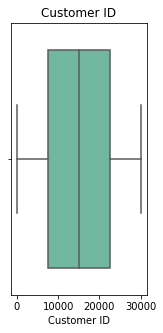

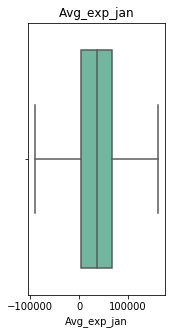

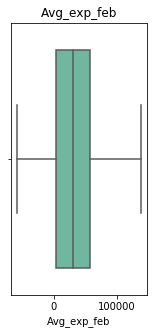

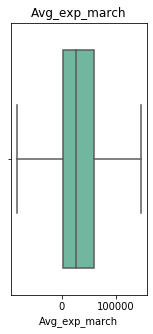

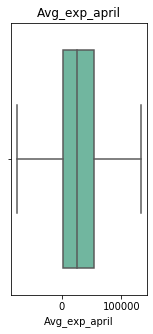

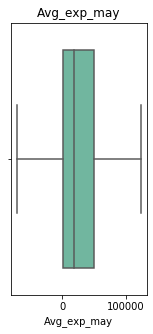

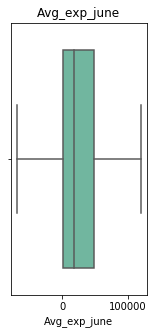

In [35]:
 ## No outliers
checking_outliers(data)

In [37]:
## All the numeric values
X = data.iloc[:,12:18]
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
X2 = sc.fit_transform(X)
X2

##Storing scaled values to original df

data.iloc[:,12:18] = X2
data.head()

,Customer ID,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Default_Payment,Avg_exp_jan,Avg_exp_feb,Avg_exp_march,Avg_exp_april,Avg_exp_may,Avg_exp_june
0,1,FEMALE,GRADUATE,MARRIED,20-40,Pd2M,Pd2M,Ptime,Ptime,Ptime,Ptime,YES,-0.850309,-0.837018,-0.863509,-0.890385,-0.844550,-0.829426
1,2,FEMALE,GRADUATE,SINGLE,20-40,Ptime,Pd2M,Ptime,Ptime,Ptime,Pd2M,YES,-0.854862,-0.867052,-0.822852,-0.815674,-0.757360,-0.745399
2,3,FEMALE,GRADUATE,SINGLE,20-40,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,-0.205479,-0.596964,-0.396966,-0.334805,-0.469850,-0.428795
3,4,FEMALE,GRADUATE,MARRIED,20-40,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,-0.066136,0.155999,0.127981,-0.220821,-0.116297,-0.093844
4,5,MALE,GRADUATE,MARRIED,40-60,Ptime,Ptime,Ptime,Ptime,Ptime,Ptime,NO,-0.764639,-0.782871,-0.146542,-0.412259,-0.386622,-0.362237


In [38]:
## Dropping customer id column
data = data.iloc[:,1:18]

## creating dummies for categorical variable
#cat_var = ['Gender', 'Academic_Qualification', 'Marital', 'Age_Years',
       #'Repayment_Status_Jan', 'Repayment_Status_Feb',
       #'Repayment_Status_March', 'Repayment_Status_April',
       #'Repayment_Status_May', 'Repayment_Status_June', 'Default_Payment']


#creating dataframe containing dummy variables
dummy_df= pd.get_dummies(data, drop_first= True)
dummy_df.head()


#Y_df = dummy_df['Default_Payment_YES']

#X_df = dummy_df.drop('Default_Payment_YES', axis = 1)


,Avg_exp_jan,Avg_exp_feb,Avg_exp_march,Avg_exp_april,Avg_exp_may,Avg_exp_june,Gender_MALE,Academic_Qualification_OTHERS,Academic_Qualification_POSTGRADUATE,Academic_Qualification_PROFESSIONAL,Academic_Qualification_UNDERGRADUATE,Academic_Qualification_UNKNOWN,Marital_SINGLE,Marital_UNDEFINED,Age_Years_20-40,Age_Years_40-60,Age_Years_60-80,Repayment_Status_Jan_Pd2M,Repayment_Status_Jan_Pd3M,Repayment_Status_Jan_Pd4M,Repayment_Status_Jan_Pd5M,Repayment_Status_Jan_Pd6M,Repayment_Status_Jan_Ptime,Repayment_Status_Feb_Pd2M,Repayment_Status_Feb_Pd3M,Repayment_Status_Feb_Pd4M,Repayment_Status_Feb_Pd5M,Repayment_Status_Feb_Pd6M,Repayment_Status_Feb_Ptime,Repayment_Status_March_Pd2M,Repayment_Status_March_Pd3M,Repayment_Status_March_Pd4M,Repayment_Status_March_Pd5M,Repayment_Status_March_Pd6M,Repayment_Status_March_Ptime,Repayment_Status_April_Pd2M,Repayment_Status_April_Pd3M,Repayment_Status_April_Pd4M,Repayment_Status_April_Pd5M,Repayment_Status_April_Pd6M,Repayment_Status_April_Ptime,Repayment_Status_May_Pd3M,Repayment_Status_May_Pd4M,Repayment_Status_May_Pd5M,Repayment_Status_May_Pd6M,Repayment_Status_May_Ptime,Repayment_Status_June_Pd3M,Repayment_Status_June_Pd4M,Repayment_Status_June_Pd5M,Repayment_Status_June_Pd6M,Repayment_Status_June_Ptime,Default_Payment_YES
0,-0.850309,-0.837018,-0.863509,-0.890385,-0.844550,-0.829426,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,-0.854862,-0.867052,-0.822852,-0.815674,-0.757360,-0.745399,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,-0.205479,-0.596964,-0.396966,-0.334805,-0.469850,-0.428795,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,-0.066136,0.155999,0.127981,-0.220821,-0.116297,-0.093844,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,-0.764639,-0.782871,-0.146542,-0.412259,-0.386622,-0.362237,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [48]:
## Splitting data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size = 0.3, random_state = 20)

In [50]:
## 
print("X_train",len(X_train), "y_train", len(Y_train))
print("Y_test", len(Y_test), 'x_test', len(X_test))


## Both the train and test splits equal ... Yayyyy !!!!

X_train 21000 y_train 21000
Y_test 9000 x_test 9000


In [51]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [52]:
rf_c = RandomForestClassifier(n_estimators = 250, max_depth = 10, random_state = 20)
rf_c.fit(X_train,Y_train)
y_predict = rf_c.predict(X_test)


In [53]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

print('Random Forest Accuracy',metrics.accuracy_score(Y_test, y_predict))

Random Forest Accuracy 0.8235555555555556


In [59]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,y_predict)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[6635  368]
 [1220  777]]
Accuracy :  0.8235555555555556
Sensitivity :  0.9474510923889762
Specificity :  0.3890836254381572


In [60]:
print('Classification Report',metrics.classification_report(Y_test, y_predict))

Classification Report               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7003
           1       0.68      0.39      0.49      1997

    accuracy                           0.82      9000
   macro avg       0.76      0.67      0.69      9000
weighted avg       0.81      0.82      0.80      9000



In [61]:
## We can clearly see that the class difference 
## So predicting probabilities nd then setting threshols value

prob = rf_c.predict_proba(X_test)
df1 = pd.DataFrame(prob,columns = rf_c.classes_ , index = X_test.index)
df1.head()

,0,1
4455,0.605150,0.394850
670,0.316311,0.683689
8994,0.643648,0.356352
16732,0.186992,0.813008
21985,0.701738,0.298262


In [62]:
np.mean(df1)

0    0.771847
1    0.228153
dtype: float64

In [78]:
df1['Pred_values'] = df1.iloc[:,1].apply(lambda x : 1 if x > 0.17 else 0)
df1

,0,1,Pred_values
4455,0.605150,0.394850,1
670,0.316311,0.683689,1
8994,0.643648,0.356352,1
16732,0.186992,0.813008,1
21985,0.701738,0.298262,1
11517,0.886170,0.113830,0
29235,0.880066,0.119934,0
28599,0.790350,0.209650,1
28281,0.851189,0.148811,0
27329,0.896034,0.103966,0


In [ ]:
## mean values

np.mean(df1)

In [70]:
print('\n',classification_report(Y_test,df1["Pred_values"])) 
print('Accuracy_ Score', metrics.accuracy_score(Y_test, df1['Pred_values']))


               precision    recall  f1-score   support

           0       0.88      0.79      0.83      7003
           1       0.46      0.64      0.54      1997

    accuracy                           0.75      9000
   macro avg       0.67      0.71      0.68      9000
weighted avg       0.79      0.75      0.77      9000

Accuracy_ Score 0.7544444444444445


In [79]:
cm1 = confusion_matrix(Y_test,df1['Pred_values'])
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[4919 2084]
 [ 584 1413]]
Accuracy :  0.7035555555555556
Sensitivity :  0.7024132514636584
Specificity :  0.7075613420130196
